In this kernel I am going to explore the Computer Network Traffic dataset and try to train a set of Recurrent Neural Networks aimed at predicting the expected flow of each host given the previous n days. 

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.


In [25]:
df = pd.read_csv('cs44b.csv')
df.head(10)  #displays first 10 values from the dataset.

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
5,2006-07-01,0,3320,1
6,2006-07-01,0,3561,13
7,2006-07-01,0,4134,3
8,2006-07-01,0,5617,2
9,2006-07-01,0,6478,1


We are interested to have the total flow of the day. Since have several log for the same day we are going to group by date, to classify as one date flow.

In [26]:
df['date']= pd.to_datetime(df['date'])
df = df.groupby(['date','l_ipn'],as_index=False).sum()
df.head(16)

,date,l_ipn,r_asn,f
0,2006-07-01,0,436704,106
1,2006-07-01,1,182194,640
2,2006-07-01,2,212966,1677
3,2006-07-01,3,96376,22
4,2006-07-01,4,120507,184
5,2006-07-01,5,125647,44
6,2006-07-01,6,117227,63
7,2006-07-01,7,479524,411
8,2006-07-01,8,339609,448
9,2006-07-01,9,407669,1463


In [27]:
df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek
df.head(3)

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
1,2006-07-01,1,182194,640,182,5
2,2006-07-01,2,212966,1677,182,5


## Bars and Plots

In [28]:
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4]
max4 = np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6]
max6 = np.max(ip6['f'])
ip7 = df[df['l_ipn']==7]
max7 = np.max(ip7['f'])
ip8 = df[df['l_ipn']==8]
max8 = np.max(ip8['f'])
ip9 = df[df['l_ipn']==9]
max9 = np.max(ip9['f'])
ip0.head(2)

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6


Let's plot the flow against the day of the year

In [29]:
count, division = np.histogram(ip0['f'],bins=10)


Text(0.5, 1.0, 'Local IP 9 Flow')

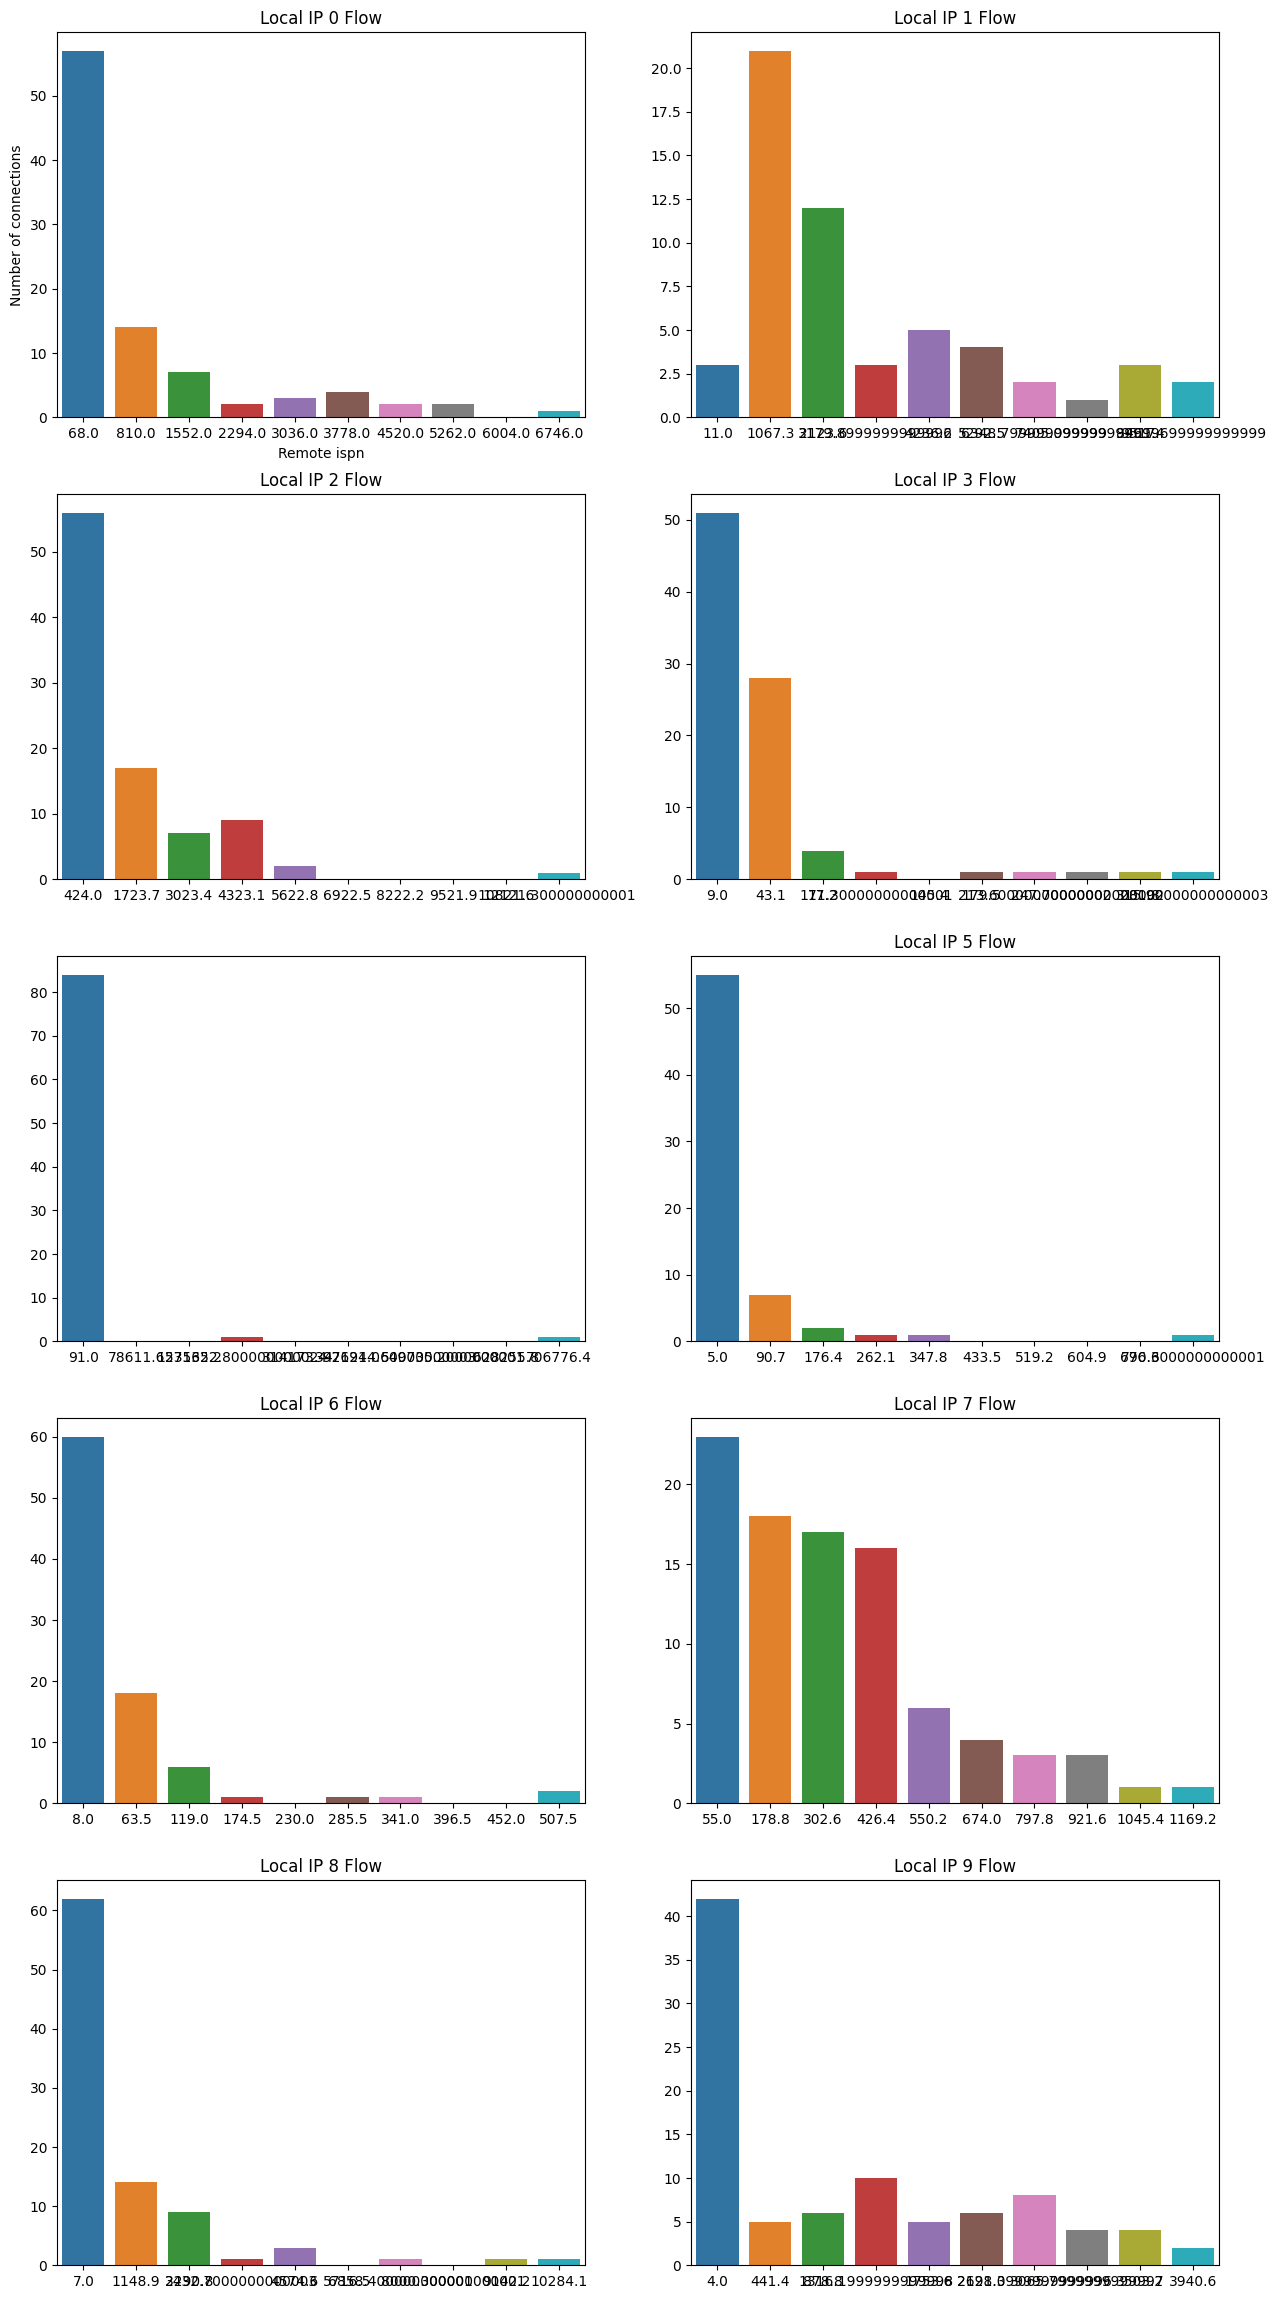

In [30]:
f,axarray = plt.subplots(5,2,figsize=(15,29))
count, division = np.histogram(ip0['f'],bins=10)
g = sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[0,0])
axarray[0,0].set_title("Local IP 0 Flow")
axarray[0,0].set_xlabel("Remote ispn")
axarray[0,0].set_ylabel("Number of connections")

count, division = np.histogram(ip1['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[0,1])
axarray[0,1].set_title("Local IP 1 Flow")

count, division = np.histogram(ip2['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[1,0])
axarray[1,0].set_title("Local IP 2 Flow")

count, division = np.histogram(ip3['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[1,1])
axarray[1,1].set_title("Local IP 3 Flow")

count, division = np.histogram(ip4['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[2,0])
axarray[2,1].set_title("Local IP 4 Flow")

count, division = np.histogram(ip5['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[2,1])
axarray[2,1].set_title("Local IP 5 Flow")

count, division = np.histogram(ip6['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[3,0])
axarray[3,0].set_title("Local IP 6 Flow")

count, division = np.histogram(ip7['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[3,1])
axarray[3,1].set_title("Local IP 7 Flow")

count, division = np.histogram(ip8['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[4,0])
axarray[4,0].set_title("Local IP 8 Flow")

count, division = np.histogram(ip9['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[4,1])
axarray[4,1].set_title("Local IP 9 Flow")



Text(0.5, 1.0, 'Local IP 9 Flow')

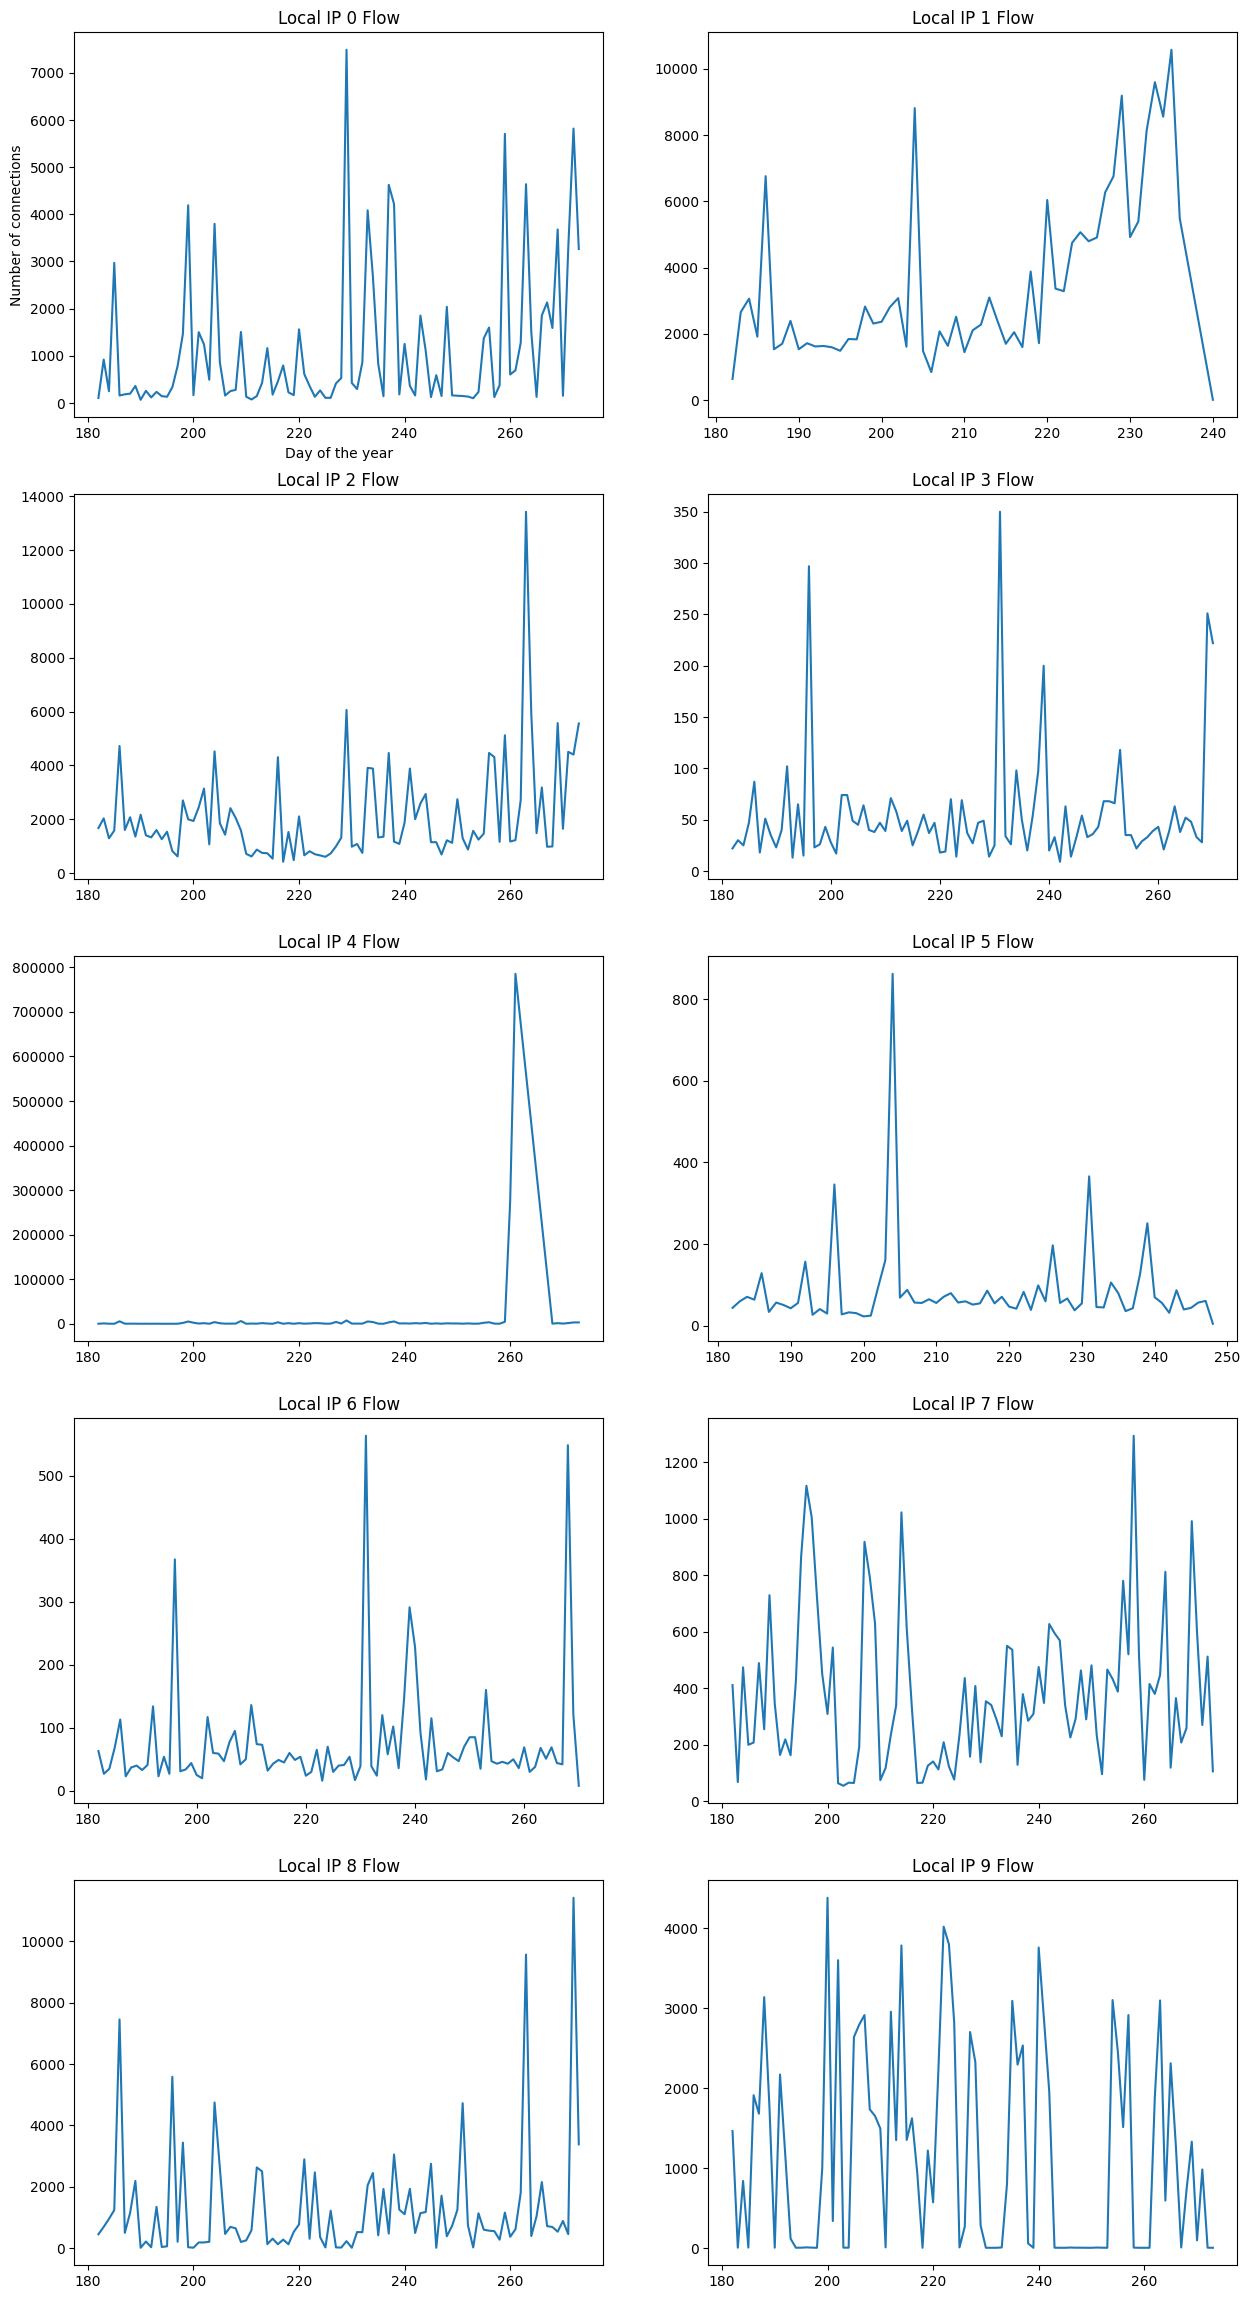

In [31]:
f,axarray = plt.subplots(5,2,figsize=(15,29))
axarray[0,0].plot(ip0['yday'],ip0['f'])
axarray[0,0].set_title("Local IP 0 Flow")
axarray[0,0].set_xlabel("Day of the year")
axarray[0,0].set_ylabel("Number of connections")

axarray[0,1].plot(ip1['yday'], ip1['f'])
axarray[0,1].set_title("Local IP 1 Flow")

axarray[1,0].plot(ip2['yday'], ip2['f'])
axarray[1,0].set_title("Local IP 2 Flow")


axarray[1,1].plot(ip3['yday'], ip3['f'])
axarray[1,1].set_title("Local IP 3 Flow")



axarray[2,0].plot(ip4['yday'], ip4['f'])
axarray[2,0].set_title("Local IP 4 Flow")


axarray[2,1].plot(ip5['yday'], ip5['f'])
axarray[2,1].set_title("Local IP 5 Flow")


axarray[3,0].plot(ip6['yday'], ip6['f'])
axarray[3,0].set_title("Local IP 6 Flow")


axarray[3,1].plot(ip7['yday'], ip7['f'])
axarray[3,1].set_title("Local IP 7 Flow")

axarray[4,0].plot(ip8['yday'], ip8['f'])
axarray[4,0].set_title("Local IP 8 Flow")


axarray[4,1].plot(ip9['yday'], ip9['f'])
axarray[4,1].set_title("Local IP 9 Flow")

In [32]:
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1][0:len(ip1['f'])-5]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4][0:len(ip4['f'])-7]


C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\3170615759.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip0.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,0])
C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\3170615759.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip0.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,0])
C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\3170615759.py:6: FutureWarning: The default value of numeric_only 

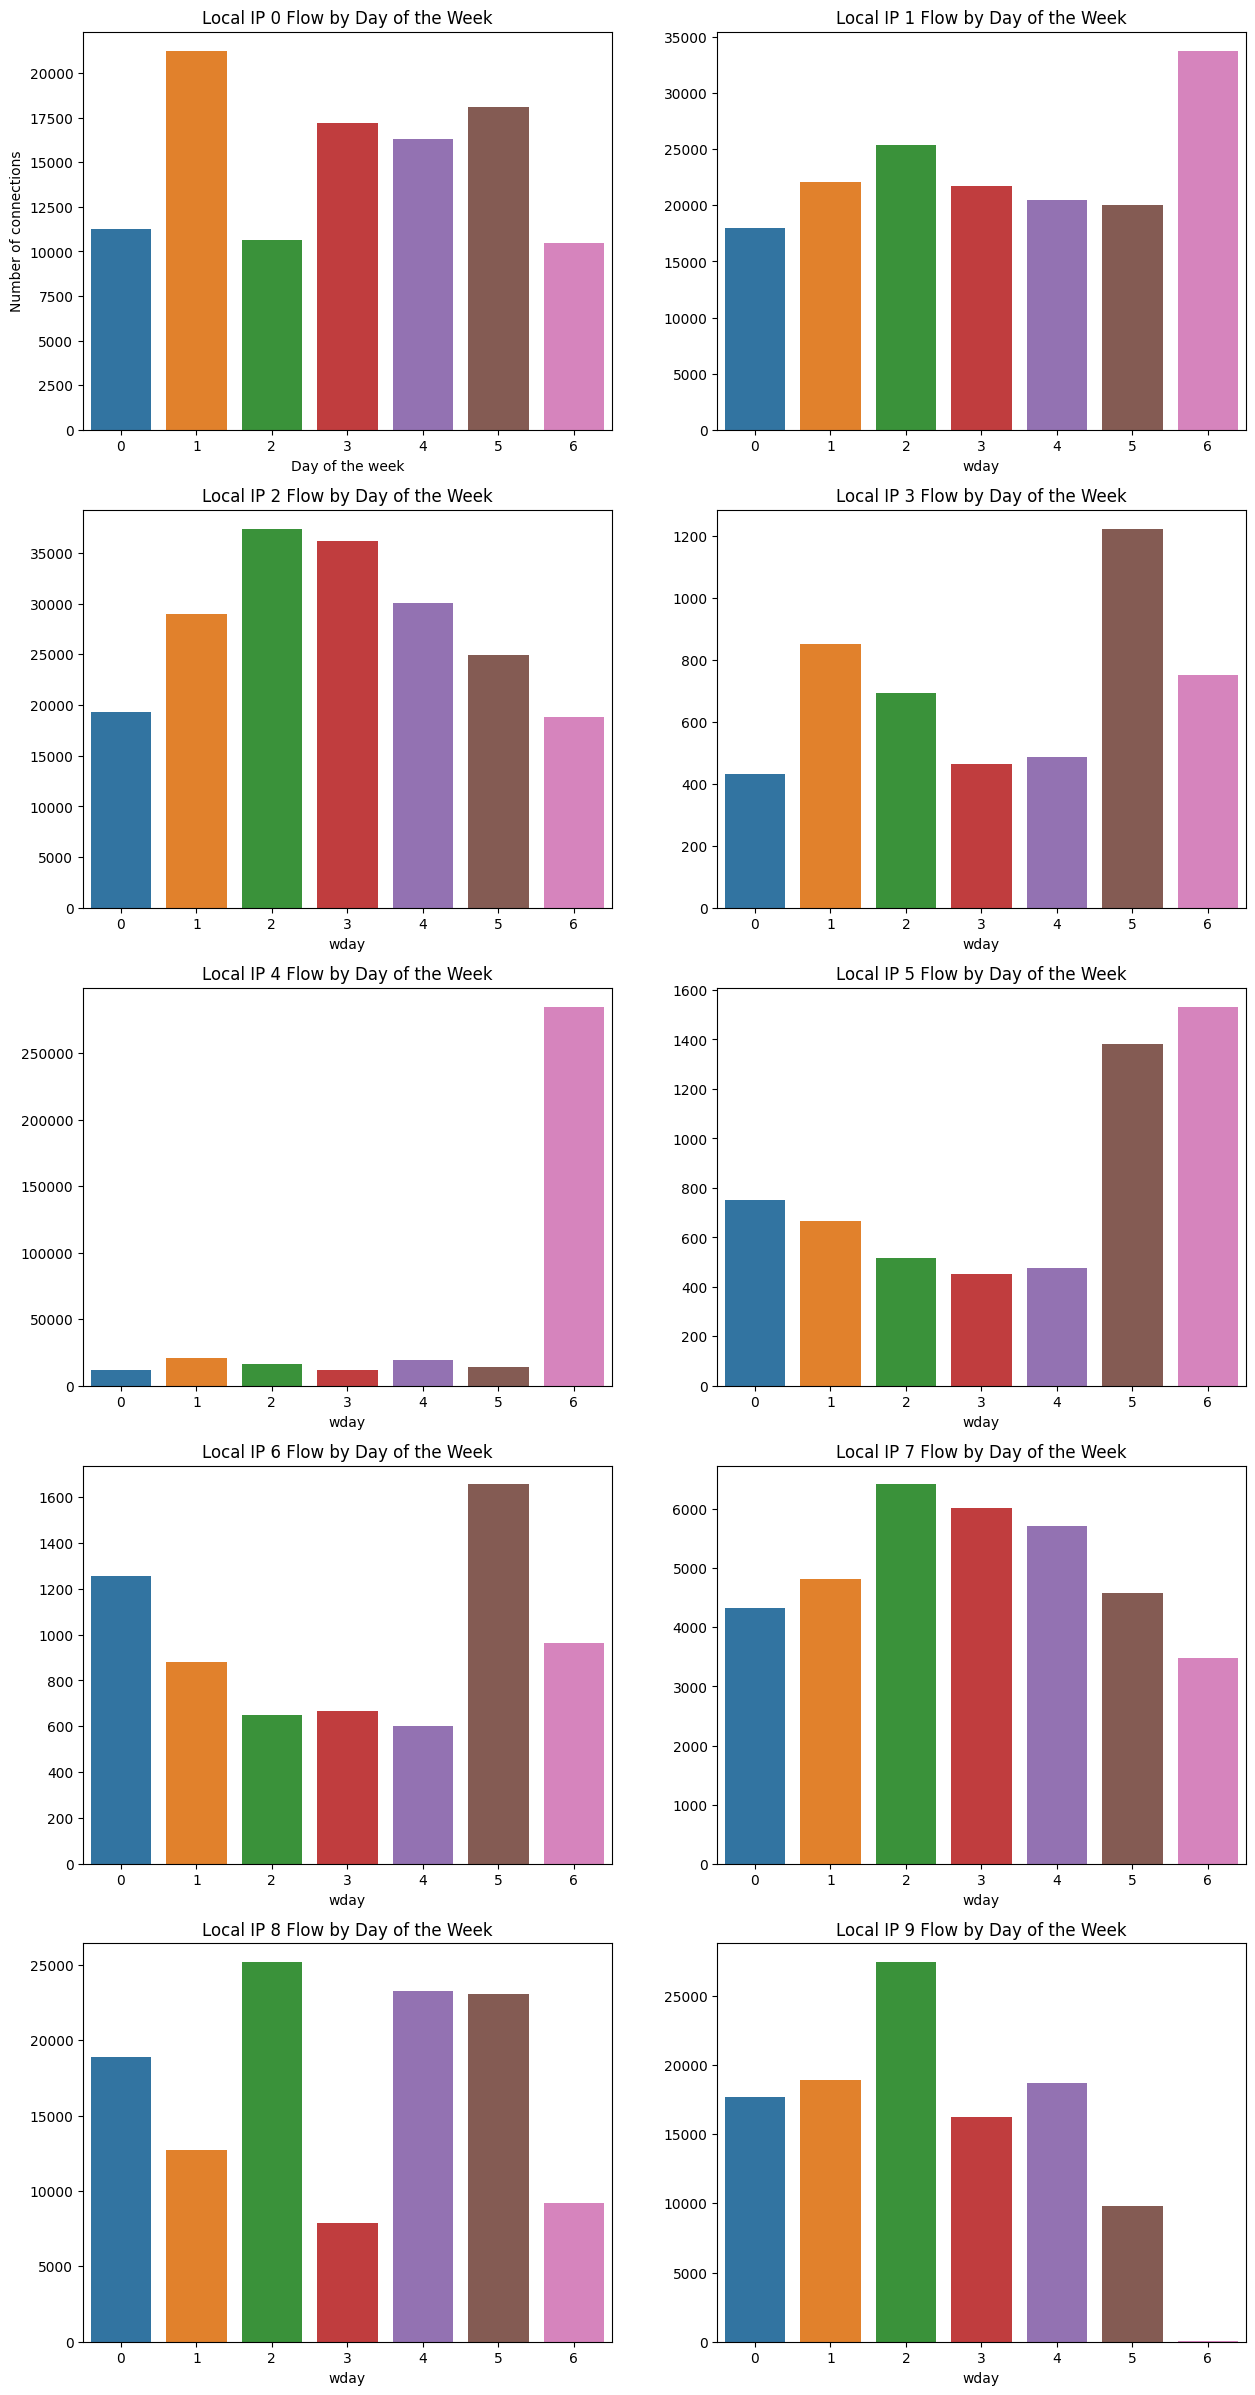

In [33]:
f,axarray = plt.subplots(5,2,figsize=(15,30))
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip0.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,0])
axarray[0,0].set_title("Local IP 0 Flow by Day of the Week")
axarray[0,0].set_xlabel("Day of the week")
axarray[0,0].set_ylabel("Number of connections")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip1.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[0,1])
axarray[0,1].set_title("Local IP 1 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip2.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[1,0])
axarray[1,0].set_title("Local IP 2 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip3.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[1,1])
axarray[1,1].set_title("Local IP 3 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip4.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[2,0])
axarray[2,0].set_title("Local IP 4 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip5.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[2,1])
axarray[2,1].set_title("Local IP 5 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip6.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[3,0])
axarray[3,0].set_title("Local IP 6 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip7.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[3,1])
axarray[3,1].set_title("Local IP 7 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip8.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[4,0])
axarray[4,0].set_title("Local IP 8 Flow by Day of the Week")
sns.barplot(x= ip0.groupby('wday',as_index=False).sum()['wday'],y= ip9.groupby('wday',as_index=False).sum()['f'].values,ax=axarray[4,1])
axarray[4,1].set_title("Local IP 9 Flow by Day of the Week")

plt.show()

## Predicting Flow - Reccurrent Neural Network

Recurrent Nural Network https://en.wikipedia.org/wiki/Recurrent_neural_network are a special type of NN where connections between nuerons crete cycles that make them depending, also, not just non the current input but, also, on the n previous inputs. This makes them particularly performing when it comes to predict time series. 

In order to train it we create a feature dataset where each row contains the sequence of the prvious n (lookback variable) observations paired with the day of the week and the target value (y_train) is the flow to predict for the current day.

In [34]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.metrics import mean_squared_error

Reccurrent Neural Networks work better with normalized data so we are going to normalize the 10 list of flow data.

In [35]:
fv =[float(v)/float(max0) for v in ip0['f'].values]
ip0.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max1) for v in ip1['f'].values]
ip1.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max2) for v in ip2['f'].values]
ip2.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max3) for v in ip3['f'].values]
ip3.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max4) for v in ip4['f'].values]
ip4.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max5) for v in ip5['f'].values]
ip5.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max6) for v in ip6['f'].values]
ip6.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max7) for v in ip7['f'].values]
ip7.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max8) for v in ip8['f'].values]
ip8.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max9) for v in ip9['f'].values]
ip9.loc[:,'f'] =np.array(fv).reshape(-1,1)  

C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\2835469831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip0.loc[:,'f'] =np.array(fv).reshape(-1,1)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\2835469831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip2.loc[:,'f'] =np.array(fv).reshape(-1,1)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\2835469831.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

We rely on three auxiliary functions:
1. create_dataset: to create the list of features and target for our model;
2. trainModel: to train a single RNN;
3. predictFlow: to perform a prediction with a trained model.

In [36]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset['f'].iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [37]:
#from keras.layers.wrappers import TimeDistributed
from keras.constraints import nonneg
look_back = 14

def trainModel(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    model = Sequential()
    model.add(GRU(64,input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True, activation="tanh"))
    model.add(GRU(32))           
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=0)
    return model

In [38]:
def predictFlow(_model,data):
    ypred=[0]*look_back
 
    for k in range(len(data)-look_back):
        pattern = data[k:k+look_back].values
        x = np.reshape(pattern, (1, len(pattern), 2))
        ypred.append(_model.predict(x)[0][0])

    return ypred

In [39]:
m0 = trainModel(ip0[['f','wday']].copy())
m1 = trainModel(ip1[['f','wday']].copy())
m2 = trainModel(ip2[['f','wday']].copy())
m3 = trainModel(ip3[['f','wday']].copy())
m4 = trainModel(ip4[['f','wday']].copy())
m5 = trainModel(ip5[['f','wday']].copy())
m6 = trainModel(ip6[['f','wday']].copy())
m7 = trainModel(ip7[['f','wday']].copy())
m8 = trainModel(ip8[['f','wday']].copy())
m9 = trainModel(ip9[['f','wday']].copy())



1/1 [==============================] - 0s 35ms/step


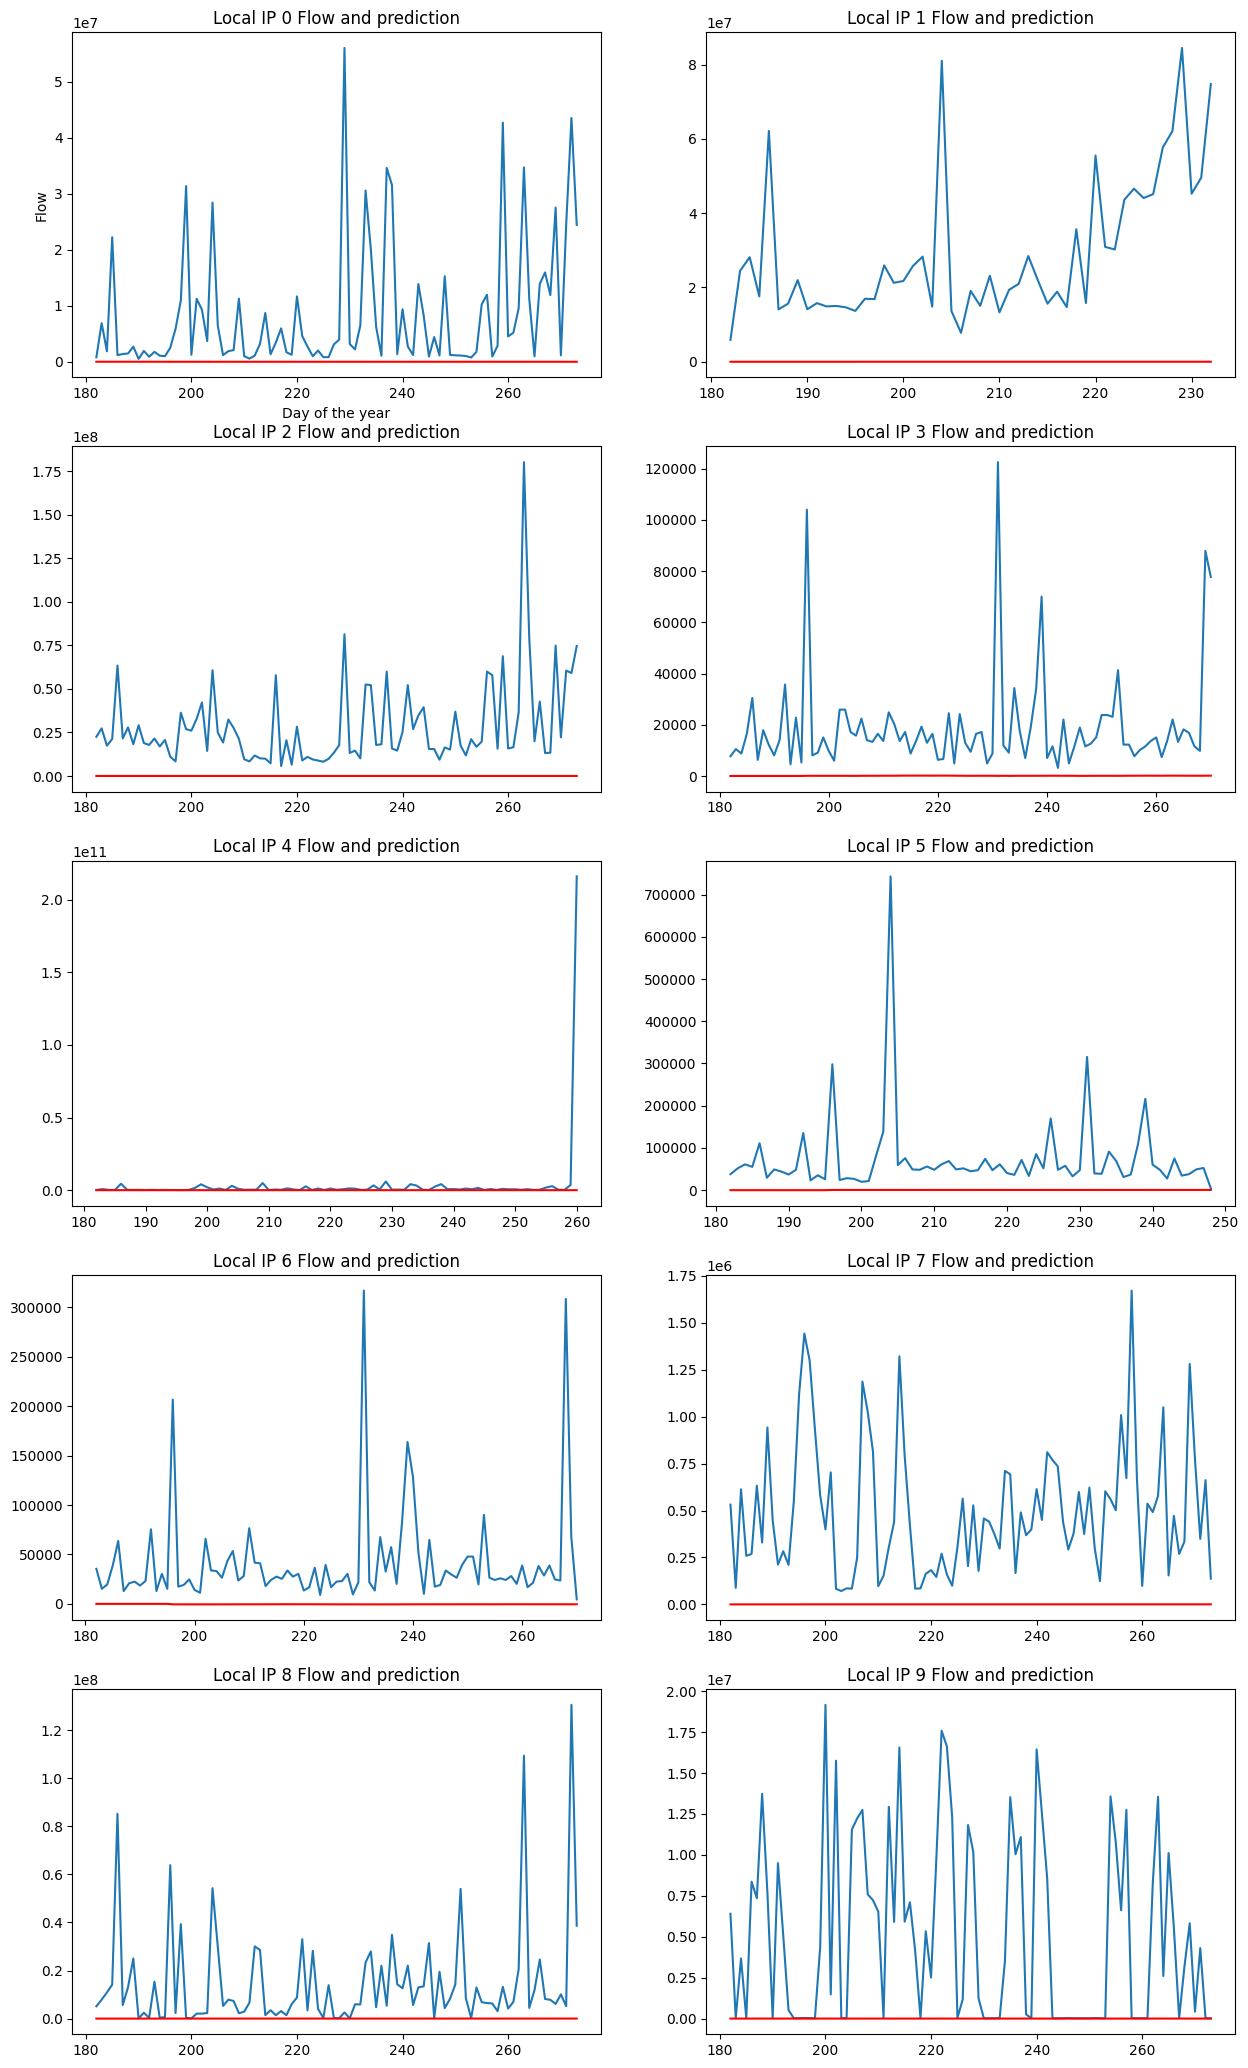

In [54]:
f,axarray = plt.subplots(5,2,figsize=(15,26))

ypred0 = np.multiply(predictFlow(m0,ip0[['f','wday']].copy()),max0)
ip0f = np.multiply(ip0['f'],max0)
ypred1 = np.multiply(predictFlow(m1,ip1[['f','wday']].copy()),max1)
ip1f = np.multiply(ip1['f'],max1)
ypred2 = np.multiply(predictFlow(m2,ip2[['f','wday']].copy()),max2)
ip2f = np.multiply(ip2['f'],max2)

ypred3 = np.multiply(predictFlow(m3,ip3[['f','wday']].copy()),max3)
ip3f = np.multiply(ip3['f'],max3)
ypred4 = np.multiply(predictFlow(m4,ip4[['f','wday']].copy()),max4)
ip4f = np.multiply(ip4['f'],max4)
ypred5 = np.multiply(predictFlow(m5,ip5[['f','wday']].copy()),max5)
ip5f = np.multiply(ip5['f'],max5)

ypred6 = np.multiply(predictFlow(m6,ip6[['f','wday']].copy()),max6)
ip6f = np.multiply(ip6['f'],max6)
ypred7 = np.multiply(predictFlow(m7,ip7[['f','wday']].copy()),max7)
ip7f = np.multiply(ip7['f'],max7)
ypred8 = np.multiply(predictFlow(m8,ip8[['f','wday']].copy()),max8)
ip8f = np.multiply(ip8['f'],max8)
ypred9 = np.multiply(predictFlow(m9,ip9[['f','wday']].copy()),max9)
ip9f = np.multiply(ip9['f'],max9)

axarray[0,0].plot(ip0['yday'],ip0f)
axarray[0,0].plot(ip0['yday'],ypred0,color='r')
axarray[0,0].set_title("Local IP 0 Flow and prediction")
axarray[0,0].set_xlabel("Day of the year")
axarray[0,0].set_ylabel("Flow")

axarray[0,1].plot(ip1['yday'], ip1f)
axarray[0,1].plot(ip1['yday'], ypred1,color='r',alpha=1)
axarray[0,1].set_title("Local IP 1 Flow and prediction")

axarray[1,0].plot(ip2['yday'], ip2f)
axarray[1,0].plot(ip2['yday'], ypred2,color='r',alpha=1)
axarray[1,0].set_title("Local IP 2 Flow and prediction")

axarray[1,1].plot(ip3['yday'], ip3f)
axarray[1,1].plot(ip3['yday'], ypred3,color='r',alpha=1)
axarray[1,1].set_title("Local IP 3 Flow and prediction")

axarray[2,0].plot(ip4['yday'], ip4f)
axarray[2,0].plot(ip4['yday'], ypred4,color='r',alpha=1)
axarray[2,0].set_title("Local IP 4 Flow and prediction")

axarray[2,1].plot(ip5['yday'], ip5f)
axarray[2,1].plot(ip5['yday'], ypred5,color='r',alpha=1)
axarray[2,1].set_title("Local IP 5 Flow and prediction")

axarray[3,0].plot(ip6['yday'], ip6f)
axarray[3,0].plot(ip6['yday'], ypred6,color='r',alpha=1)
axarray[3,0].set_title("Local IP 6 Flow and prediction")

axarray[3,1].plot(ip7['yday'], ip7f)
axarray[3,1].plot(ip7['yday'], ypred7,color='r',alpha=1)
axarray[3,1].set_title("Local IP 7 Flow and prediction")

axarray[4,0].plot(ip8['yday'], ip8f)
axarray[4,0].plot(ip8['yday'], ypred8,color='r',alpha=1)
axarray[4,0].set_title("Local IP 8 Flow and prediction")

axarray[4,1].plot(ip9['yday'], ip9f)
axarray[4,1].plot(ip9['yday'], ypred9,color='r',alpha=1)
axarray[4,1].set_title("Local IP 9 Flow and prediction")
plt.show()

In [41]:
corr0 = pd.Series(ip0f).corr(pd.Series(ypred0))
corr1 = pd.Series(ip1f).corr(pd.Series(ypred1))
corr2 = pd.Series(ip2f).corr(pd.Series(ypred2))
corr3 = pd.Series(ip3f).corr(pd.Series(ypred3))
corr4 = pd.Series(ip4f).corr(pd.Series(ypred4))
corr5 = pd.Series(ip5f).corr(pd.Series(ypred5))
corr6 = pd.Series(ip6f).corr(pd.Series(ypred6))
corr7 = pd.Series(ip7f).corr(pd.Series(ypred7))
corr8 = pd.Series(ip8f).corr(pd.Series(ypred8))
corr9 = pd.Series(ip9f).corr(pd.Series(ypred9))
corrdf = pd.DataFrame({'corr0':[corr0],
                       'corr1':[corr1],
                       'corr2':[corr2],
                       'corr3':[corr3],
                       'corr4':[corr4],
                       'corr5':[corr5],
                       'corr6':[corr6],
                       'corr7':[corr7],
                       'corr8':[corr8],
                       'corr9':[corr9]})
corrdf.head()

,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
0,-0.003039,0.571219,0.091873,0.446021,0.434157,0.193253,-0.243939,-0.178804,0.019841,-0.409925


## Approximate Entropy

In [42]:
ip0 = df[df['l_ipn']==0]
ip1 = df[df['l_ipn']==1][0:len(df[df['l_ipn']==1])-5]
ip2 = df[df['l_ipn']==2]
ip3 = df[df['l_ipn']==3]
ip4 = df[df['l_ipn']==4][0:len(df[df['l_ipn']==4])-7]
ip5 = df[df['l_ipn']==5]
ip6 = df[df['l_ipn']==6]
ip7 = df[df['l_ipn']==7]
ip8 = df[df['l_ipn']==8]
ip9 = df[df['l_ipn']==9]

In [43]:
def ApEn(U, m, r):

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [44]:
m=2
r = 3
e0 = ApEn(np.multiply(ip0['f'].values,1),m,r)
e1 = ApEn(np.multiply(ip1['f'].values,1),m,r)
e2 = ApEn(np.multiply(ip2['f'].values,1),m,r)
e3 = ApEn(np.multiply(ip3['f'].values,1),m,r)
e4 = ApEn(np.multiply(ip4['f'].values,1),m,r)
e5 = ApEn(np.multiply(ip5['f'].values,1),m,r)
e6 = ApEn(np.multiply(ip6['f'].values,1),m,r)
e7 = ApEn(np.multiply(ip7['f'].values,1),m,r)
e8 = ApEn(np.multiply(ip8['f'].values,1),m,r)
e9 = ApEn(np.multiply(ip9['f'].values,1),m,r)

In [45]:
ent_values = pd.DataFrame({'e0':[e0], 'e1':[e1],'e2':[e2],'e3':[e3],'e4':[e4],'e5':[e5],
              'e6':[e6],'e7':[e7],'e8':[e8],'e9':[e9]})
ent_values.head()

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9
0,0.01105,0.020203,0.01105,0.360497,0.012903,0.169414,0.286478,0.004184,0.01105,0.264248


The idea is that the higher is the ApEn value the more irregular the time series is. Let's see now how the IP flow entropies will evolves in time.

In [46]:
def entropyTrend(data,d):
    etrend = [ApEn(np.multiply(data[n:n+d].values,1),2,3) for n in range(len(data)-d)]
    return etrend

C:\Users\harsh\AppData\Local\Temp\ipykernel_14768\1501390104.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  etrend = [ApEn(np.multiply(data[n:n+d].values,1),2,3) for n in range(len(data)-d)]


Text(0.5, 1.0, 'Local IP 9 ApEn Variation')

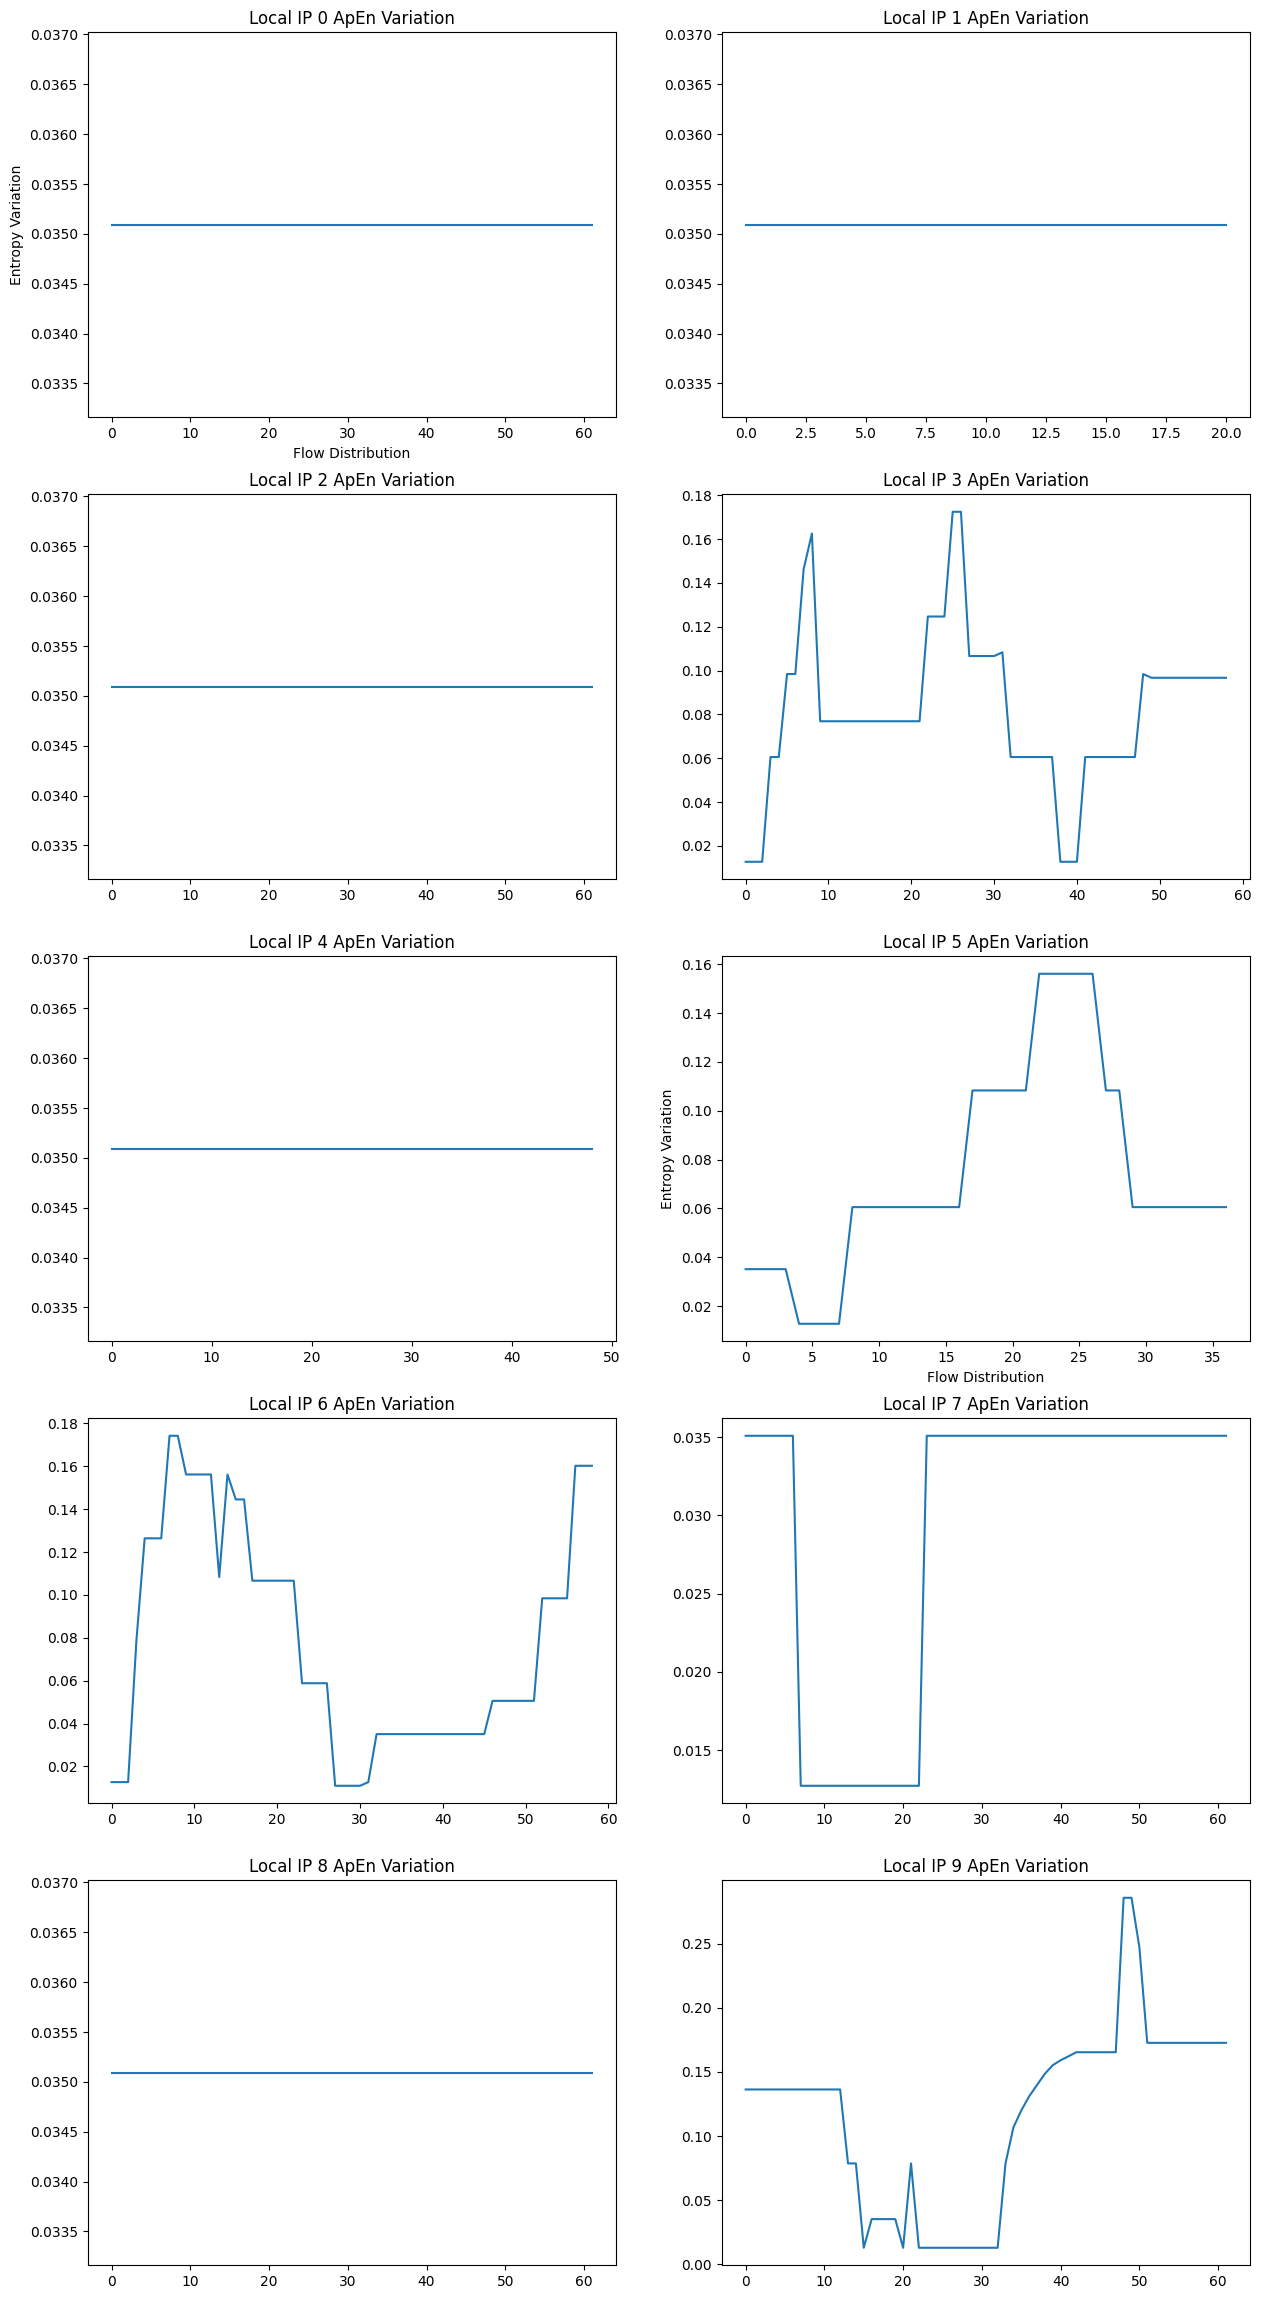

In [55]:
original=[1,1,1,0,1,0,0,1,1,0]
f,axarray = plt.subplots(5,2,figsize=(15,29))
days = 30
et0 = entropyTrend(ip0['f'],days)
axarray[0,0].plot(range(len(et0)),et0)
axarray[0,0].set_title("Local IP 0 ApEn Variation")
axarray[0,0].set_xlabel("Flow Distribution")
axarray[0,0].set_ylabel("Entropy Variation")

et1 = entropyTrend(ip1['f'],days)
axarray[0,1].plot(range(len(et1)),et1)
axarray[0,1].set_title("Local IP 1 ApEn Variation")

et2 = entropyTrend(ip2['f'],days)
axarray[1,0].plot(range(len(et2)),et2)
axarray[1,0].set_title("Local IP 2 ApEn Variation")

et3 = entropyTrend(ip3['f'],days)
axarray[1,1].plot(range(len(et3)),et3)
axarray[1,1].set_title("Local IP 3 ApEn Variation")

et4 = entropyTrend(ip4['f'],days)
axarray[2,0].plot(range(len(et4)),et4)
axarray[2,0].set_title("Local IP 4 ApEn Variation")

et5 = entropyTrend(ip5['f'],days)
axarray[2,1].plot(range(len(et5)),et5)
axarray[2,1].set_title("Local IP 5 ApEn Variation")
axarray[2,1].set_xlabel("Flow Distribution")
axarray[2,1].set_ylabel("Entropy Variation")

et6 = entropyTrend(ip6['f'],days)
axarray[3,0].plot(range(len(et6)),et6)
axarray[3,0].set_title("Local IP 6 ApEn Variation")

et7 = entropyTrend(ip7['f'],days)
axarray[3,1].plot(range(len(et7)),et7)
axarray[3,1].set_title("Local IP 7 ApEn Variation")

et8 = entropyTrend(ip8['f'],days)
axarray[4,0].plot(range(len(et8)),et8)
axarray[4,0].set_title("Local IP 8 ApEn Variation")

et9 = entropyTrend(ip9['f'],days)
axarray[4,1].plot(range(len(et9)),et9)
axarray[4,1].set_title("Local IP 9 ApEn Variation")

CLASSIFYING WHICH IS BOTNET AND WHICH IS NOT

BOTNET = 0
NORMAL HOST = 1

In [48]:
ans=0
pred=[None,None,None,None,None,None,None,None,None,None]
i=0
ans=np.mean(et0)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe first host is not a botnet")
    pred[i]=1
else:
    print("\nThe first host is a botnet")
    pred[i]=0

ans=np.mean(et1)
i=i+1
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe second host is not a botnet")
    pred[i]=1
else:
    print("\nThe second host is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et2)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe third host is not a botnet")
    pred[i]=1
else:
    print("\nThe third is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et3)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe fourth is not a botnet")
    pred[i]=1
else:
    print("\nThe fourth is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et4)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe fifth host is not a botnet")
    pred[i]=1
else:
    print("\nThe fifth host is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et5)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe sixth host is not a botnet")
    pred[i]=1
else:
    print("\nThe sixth host is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et6)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe seventh host is not a botnet")
    pred[i]=1
else:
    print("\nThe seventh host is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et7)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe eigth host is not a botnet")
    pred[i]=1
else:
    print("\nThe eigth host is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et8)
if(ans>=0.0348 and  ans<=0.0352):
    print("\nThe ninth host is not a botnet")
    pred[i]=1
else:
    print("\nThe ninth host is a botnet")
    pred[i]=0

i=i+1
ans=np.mean(et9)
if(ans>0.0348 and  ans<=0.0352):
    print("\nThe tenth host is not a botnet")
    pred[i]=1
else:
    print("\nThe tenth host is a botnet")
    pred[i]=0




The first host is not a botnet

The second host is not a botnet

The third host is not a botnet

The fourth is a botnet

The fifth host is not a botnet

The sixth host is a botnet

The seventh host is a botnet

The eigth host is a botnet

The ninth host is not a botnet

The tenth host is a botnet


BOTNET = 0
NORMAL HOST = 1

In [49]:
print("The list for predcitions is\n")
print(pred)

The list for predcitions is

[1, 1, 1, 0, 1, 0, 0, 0, 1, 0]


BOTNET = 0
NORMAL HOST = 1

In [50]:

print("The list for ground turth us is\n")
print(original)

The list for ground turth us is

[1, 1, 1, 0, 1, 0, 0, 1, 1, 0]


In [51]:
accuracy=0
for i in range(10):
    if(pred[i]-original[i]==0):
        accuracy=accuracy+1

print("The final accuracy score in percentage is: ",accuracy*10)

The final accuracy score in percentage is:  90
